# Identifying Which Observations Utilized Fiber Offsets

## Learning Goals
By the end of this tutorial, you will:
- Know how to identify for which visits of a target the fiber was offset
- Understand some of the structure of a allVisit file

## Introduction
SDSS V offsets fibers from the center of bright sources in order to avoid saturation and bleeding any light onto the spectrum of targets that are neighbors on the chip. While this allows us to observe brighter targets than we normally would during operations, this can cause issues in the e.g. spectrophotometry of the resulting spectrum.

In this short tutorial we will demonstrate how you can identify which targets were observed with the fibers offset. Additionally, we will show some plots that demonstrate the degree of offseting as a function of the magnitude of the target.

## Imports
This tutorial requires three commonly used python packages, and an SDSS specific package
- _numpy_ for doing large array operations
- _matplotlib_ for plotting
- _astropy_ for reading fits table

Missing packages can be installed via `pip install numpy matplotlib astropy`

In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.facecolor': 'white',
                      'savefig.facecolor': 'white',
                      'font.size': 24,
                      'xtick.labelsize': 24,
                      'ytick.labelsize': 24,
                      'errorbar.capsize': 2})

### Loading data from a fits file

First, let us open the mwmAllVisit file from the SAS. The offset information is only stored at the visit level, so this is why we must look at the mwmAllVisit file.

**Where**: you can download the data --> https://dr19.sdss.org/sas/dr19/spectro/astra/0.6.0/summary/mwmAllVisit-0.6.0.fits.gz

**OR** if you are running this notebook on sciServer, the summary file is available at /home/idies/workspace/sdss_sas/dr19/spectro/astra/0.6.0/summary/

Below, the default loadpath is set to sciServer. If you download it locally, change loadpath as needed, e.g. "/Users/myuser/Downloads/"

Next, we'll use `astropy.fits` to load the file and choose the extension we want. In this case, BOSS data is in extension 1, but we want APOGEE data in extension 2.

In [ ]:
filename = 'mwmAllVisit-0.6.0.fits.gz'
localpath = '/home/idies/workspace/sdss_sas/dr19/spectro/astra/0.6.0/summary/'
allvisit = Table.read(localpath + filename, format='fits', hdu=1)

For SDSS V all offsets are done in the positive Right Ascension direction. These offset values for the visit are stored in the column `delta_ra`. This column is an array of floats, where each index is for an exposure during that visit. To identify all visits that had an offset, we simply do the following to get the visits (rows in the mwmAllVisit) and exposures (columns in the `delta_ra` array):

In [3]:
visits, exp = np.where(allvisit['delta_ra'] > 0)

In [4]:
allvisit[['sdss_id', 'delta_ra']][visits]

sdss_id,delta_ra
int64,float32[18]
89859144,1.115352 .. --
65983508,1.872786 .. --
88441661,1.145294 .. --
88443495,2.859497 .. --
88443495,2.326175 .. --
88443495,2.650124 .. --
88443495,2.650124 .. --
88443495,2.650124 .. --
88443495,2.439237 .. --


Now, let us plot the offset used for the first exposure of these visits as a function of the Gaia G magnitude of the source.

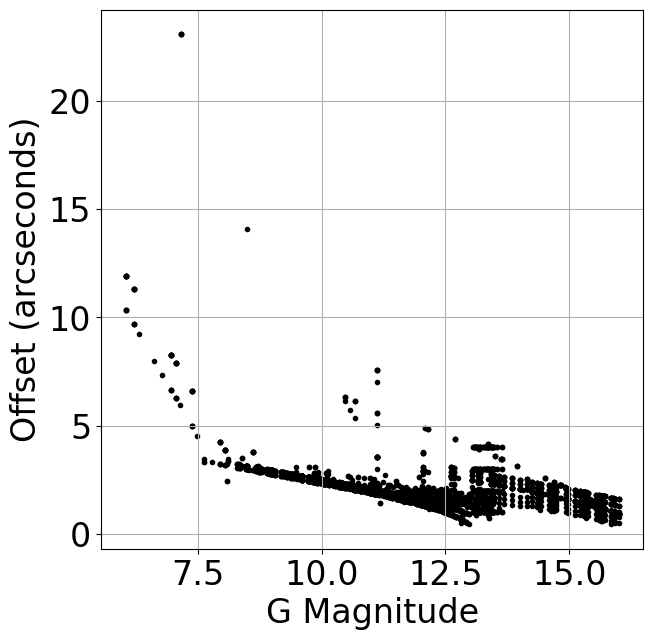

In [5]:
delta_ra_0 = np.array(allvisit['delta_ra'][visits])[:, 0]
Gmag = np.array(allvisit['g_mag'][visits])

plt.figure(figsize=(7, 7))
plt.scatter(Gmag, delta_ra_0, marker='.', c='k')
plt.grid()
plt.xlabel('G Magnitude')
plt.ylabel('Offset (arcseconds)')
plt.show()

Here we can see that the offset function is more complicated than a simple function of one magnitude. Indeed, the offset function changes based on the lunation and design mode (restrictions on the observing conditions for the visit), and there is a color dependence as well. The details of this can be found ???? and should be considered when evaluating these data.

### About this notebook

This notebook was created to illustrate how to identify targets that have been observed with offset fibers.

**Authors**: Ilija Medan

**Last Update**: 2024 December 5

If you use `astropy`  for published research, please cite the
authors. Follow this link for more information about citing `astropy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)

And of course please [cite](https://sdss.org/collaboration/citing-sdss/) SDSS when you use our data.